In [538]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline

In [539]:
df=pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [540]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [541]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [542]:
df.shape

(145, 2)

In [543]:
df.dropna(axis=0,inplace=True)

In [544]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [546]:
df['Month']=pd.to_datetime(df['Month'])

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [548]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [549]:
df.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

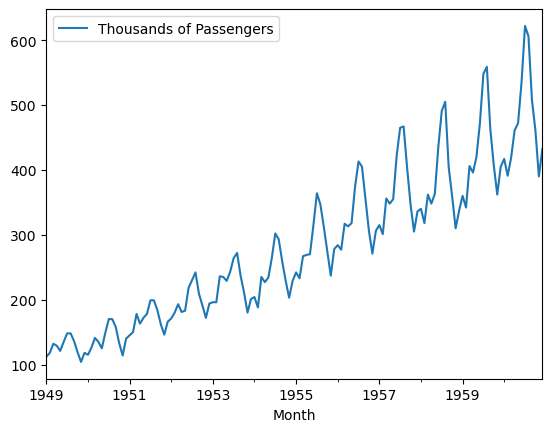

In [550]:
df.plot()

In [551]:
from statsmodels.tsa.stattools import adfuller

In [552]:
def test_df(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

test_df(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060441
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [553]:
## Use Techniques Differencing
df['Passengers First Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [554]:
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [555]:
test_df(df['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700034
p- value: 0.054213290283824954
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [556]:
## Use Techniques Differencing
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [557]:
test_df(df['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246852
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [558]:
### 12 months 
## Use Techniques Differencing
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [559]:
test_df(df['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924796
p- value: 0.011551493085515008
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [560]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

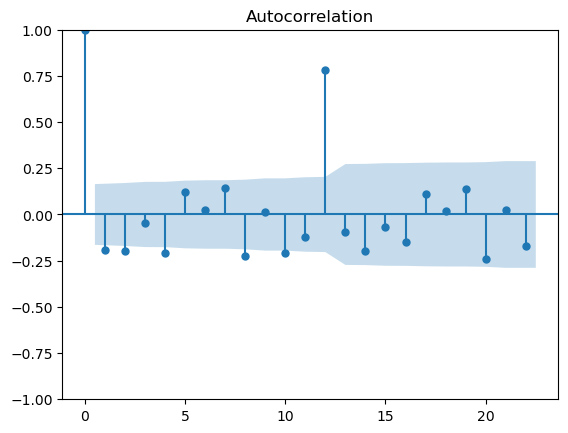

In [561]:
acf = plot_acf(df["Passengers Second Difference"].dropna())

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


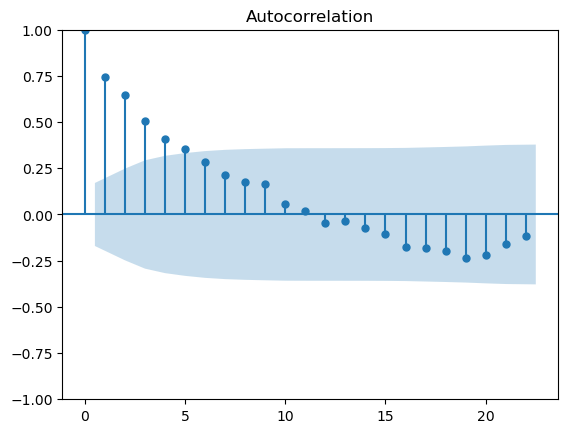

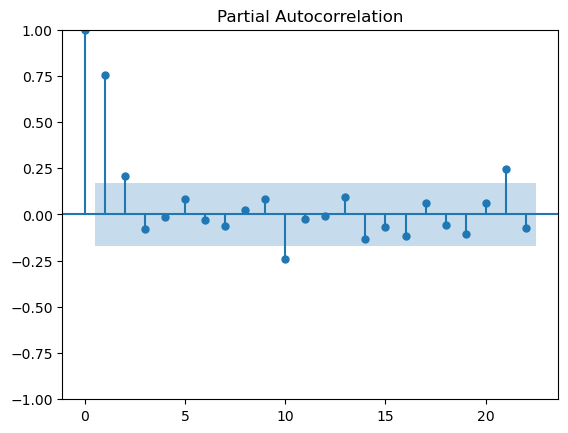

In [562]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

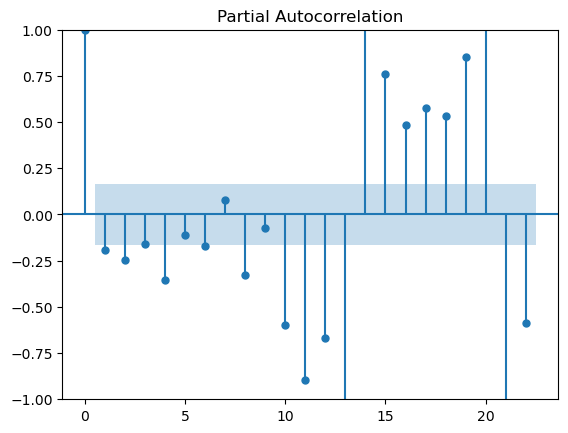

In [563]:
result = plot_pacf(df["Passengers Second Difference"].dropna())

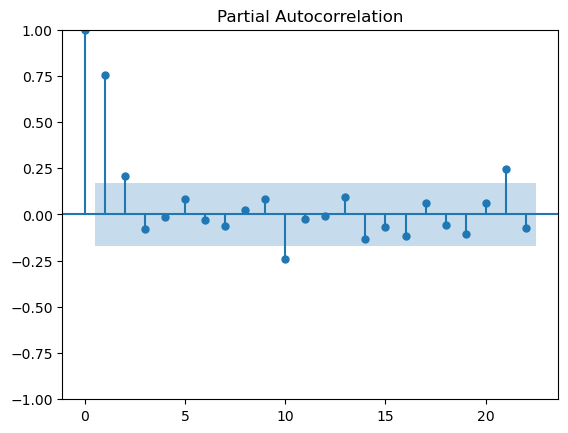

In [564]:
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

In [565]:
df

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [566]:
from datetime import datetime, timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [567]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [568]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [569]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [570]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [571]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [572]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [573]:
model_Arima_fit=model_ARIMA.fit()

In [574]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Thu, 19 Oct 2023   AIC                            736.477
Time:                             14:55:07   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0938     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [575]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [576]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [577]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [578]:
pred

1956-01-01    300.183613
1956-02-01    309.478356
1956-03-01    316.443015
1956-04-01    307.827544
1956-05-01    318.544234
1956-06-01    348.922084
1956-07-01    366.020290
1956-08-01    346.567536
1956-09-01    332.120970
1956-10-01    307.734755
1956-11-01    311.623913
1956-12-01    339.828198
1957-01-01    349.840408
1957-02-01    356.098236
1957-03-01    350.687829
1957-04-01    350.080466
1957-05-01    361.157696
1957-06-01    381.216520
1957-07-01    382.319378
1957-08-01    372.852583
1957-09-01    364.110099
1957-10-01    356.108927
1957-11-01    371.293792
1957-12-01    385.323600
1958-01-01    392.077842
1958-02-01    391.405855
1958-03-01    388.404584
1958-04-01    391.572862
1958-05-01    402.448085
1958-06-01    413.255691
1958-07-01    410.853421
1958-08-01    407.670549
1958-09-01    402.486340
1958-10-01    406.089152
1958-11-01    418.125319
1958-12-01    426.012382
1959-01-01    429.205588
1959-02-01    427.352238
1959-03-01    428.150995
1959-04-01    432.790854


In [579]:
residuals

Month
1956-01-01    -16.183613
1956-02-01    -32.478356
1956-03-01      0.556985
1956-04-01      5.172456
1956-05-01     -0.544234
1956-06-01     25.077916
1956-07-01     46.979710
1956-08-01     58.432464
1956-09-01     22.879030
1956-10-01     -1.734755
1956-11-01    -40.623913
1956-12-01    -33.828198
1957-01-01    -34.840408
1957-02-01    -55.098236
1957-03-01      5.312171
1957-04-01     -2.080466
1957-05-01     -6.157696
1957-06-01     40.783480
1957-07-01     82.680622
1957-08-01     94.147417
1957-09-01     39.889901
1957-10-01     -9.108927
1957-11-01    -66.293792
1957-12-01    -49.323600
1958-01-01    -52.077842
1958-02-01    -73.405855
1958-03-01    -26.404584
1958-04-01    -43.572862
1958-05-01    -39.448085
1958-06-01     21.744309
1958-07-01     80.146579
1958-08-01     97.329451
1958-09-01      1.513660
1958-10-01    -47.089152
1958-11-01   -108.125319
1958-12-01    -89.012382
1959-01-01    -69.205588
1959-02-01    -85.352238
1959-03-01    -22.150995
1959-04-01    -36.7

<AxesSubplot:ylabel='Density'>

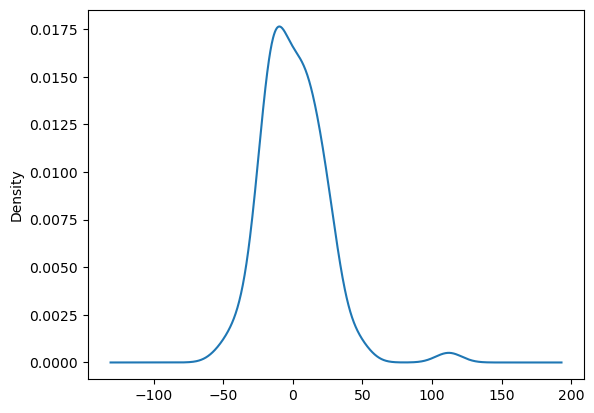

In [580]:
model_Arima_fit.resid.plot(kind='kde')

In [581]:
test_data['Predicted_ARIMA']=pred

C:\Users\Dell\AppData\Local\Temp\ipykernel_29392\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

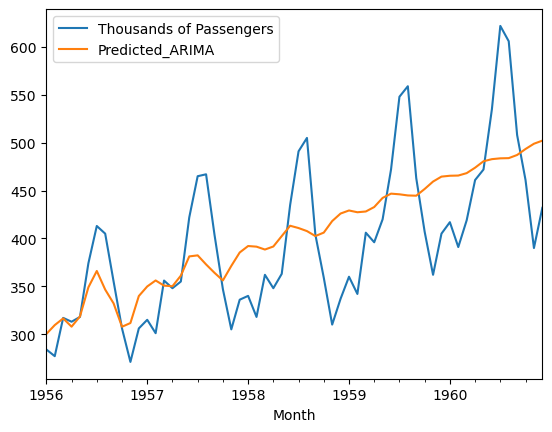

In [582]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


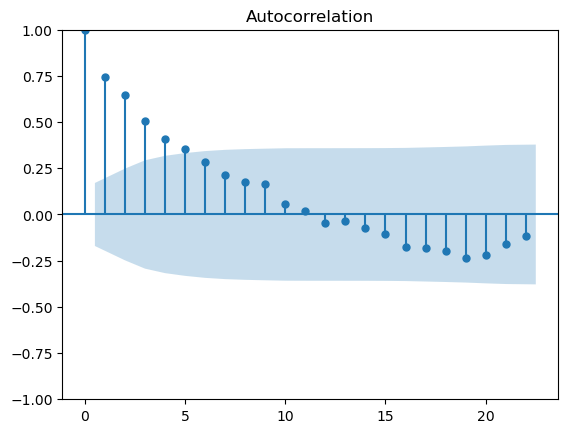

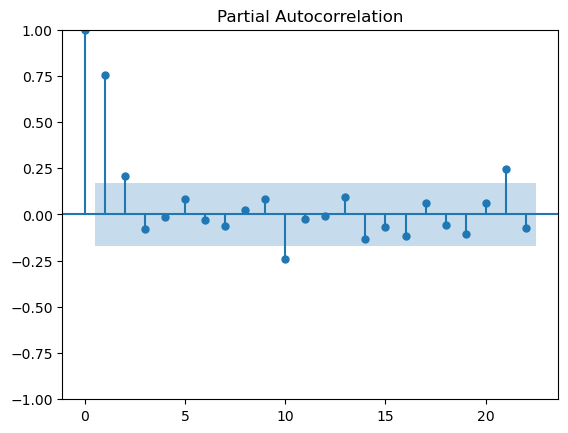

In [583]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

In [584]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [585]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [586]:
model_SARIMA_fit=model_SARIMA.fit()

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [587]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Thu, 19 Oct 2023   AIC                            736.477
Time:                             14:55:09   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0938     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [588]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883991
1960-09-01,508.0,-98.0,-82.0,45.0,487.184115
1960-10-01,461.0,-47.0,51.0,54.0,493.432796
1960-11-01,390.0,-71.0,-24.0,28.0,498.930086
1960-12-01,432.0,42.0,113.0,27.0,502.159838


In [589]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [590]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

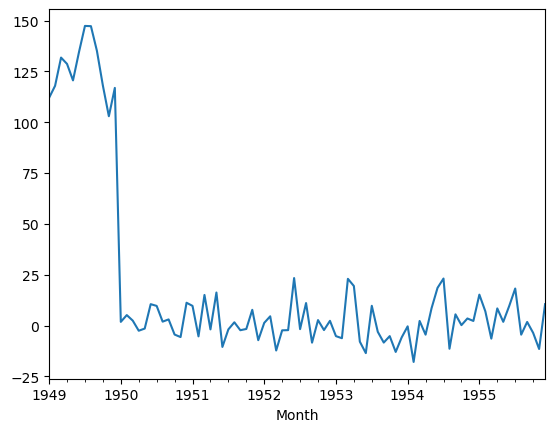

In [591]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

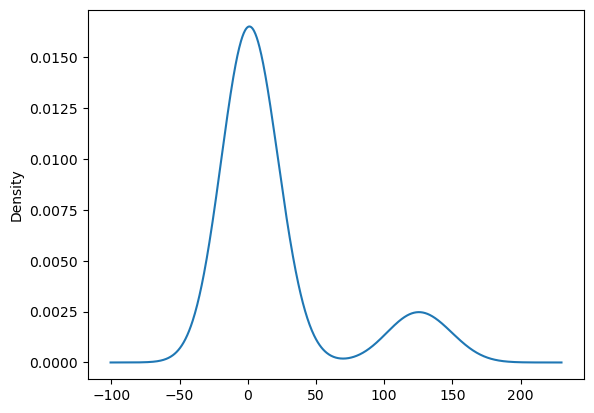

In [592]:
model_SARIMA_fit.resid.plot(kind='kde')


In [593]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Dell\AppData\Local\Temp\ipykernel_29392\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [594]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183613,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,309.478356,NaN
1956-03-01,317.0,40.0,47.0,50.0,316.443015,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,307.827544,NaN
1956-05-01,318.0,5.0,9.0,48.0,318.544234,NaN
1956-06-01,374.0,56.0,51.0,59.0,348.922084,NaN
1956-07-01,413.0,39.0,-17.0,49.0,366.020290,403.401190
1956-08-01,405.0,-8.0,-47.0,58.0,346.567536,385.075630
1956-09-01,355.0,-50.0,-42.0,43.0,332.120970,349.448044


<AxesSubplot:xlabel='Month'>

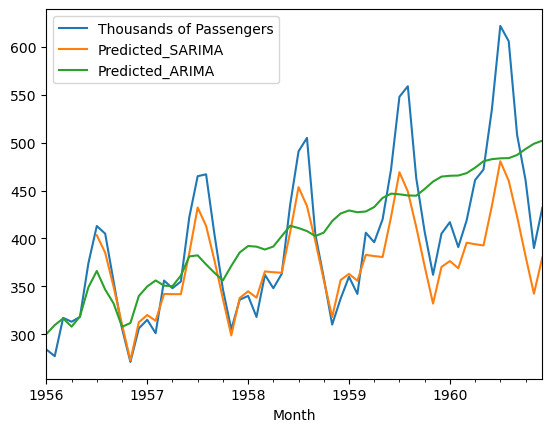

In [595]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()